In [1]:
# Dependencies and Setup
import csv
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress 
import seaborn as sns 
from scipy import stats
import scipy.stats as sts

# Study data files
UE_data_path = "../Data/Unemployment_rates_states_5yrs_Clean.csv"

# Read the Unemployment Data 
UE_data_path = pd.read_csv(UE_data_path)
UE_data_path.head()

,State,1/1/2015,2/1/2015,3/1/2015,4/1/2015,5/1/2015,6/1/2015,7/1/2015,8/1/2015,9/1/2015,...,12/1/2019,1/1/2020,2/1/2020,3/1/2020,4/1/2020,5/1/2020,6/1/2020,7/1/2020,8/1/2020,9/20/2020
0,Alabama,6.0,6.0,6.1,6.1,6.2,6.2,6.2,6.1,6.1,...,2.7,2.7,2.7,3,13.8,9.6,7.6,7.9,5.6,6.6
1,Alaska,6.5,6.5,6.5,6.5,6.5,6.5,6.5,6.5,6.5,...,6.1,6.0,5.8,5.2,13.5,12.7,12.4,11.6,7.4,7.2
2,Arizona,6.4,6.3,6.3,6.2,6.1,6.1,6.0,6.0,5.9,...,4.5,4.5,4.5,6.1,13.4,9.0,10.0,10.7,5.9,6.7
3,Arkansas,5.6,5.5,5.5,5.4,5.3,5.1,5.0,4.8,4.7,...,3.5,3.5,3.5,5,10.8,9.6,8.1,7.1,7.4,7.3
4,California,6.8,6.7,6.6,6.5,6.4,6.2,6.1,6.0,5.9,...,3.9,3.9,3.9,5.5,16.4,16.4,14.9,13.5,11.2,11.0


In [2]:
print ("data-frame shape: ", UE_data_path.shape)

data-frame shape:  (52, 70)


In [3]:
col = []
for x in UE_data_path.columns:
    if x != "State":
        col.append(x)

In [4]:
# col

In [5]:
d = []
for i, row in UE_data_path.iterrows():
    state = row["State"]
    for x in col:
        dat = x.split("/")
        a ={
            "State":state,
            "Date": f"{dat[0].rjust(2, '0')}-{dat[1].rjust(2, '0')}-{dat[2]}",
            "Year": dat[2],
            "Month": dat[0],
            "Unemployment Rate":row[x]
        }
        d.append(a)

In [6]:
new_df = pd.DataFrame(d)
new_df.head()

,State,Date,Year,Month,Unemployment Rate
0,Alabama,01-01-2015,2015,1,6
1,Alabama,02-01-2015,2015,2,6
2,Alabama,03-01-2015,2015,3,6.1
3,Alabama,04-01-2015,2015,4,6.1
4,Alabama,05-01-2015,2015,5,6.2


In [7]:
new_df["Date"]

0       01-01-2015
1       02-01-2015
2       03-01-2015
3       04-01-2015
4       05-01-2015
           ...    
3583    05-01-2020
3584    06-01-2020
3585    07-01-2020
3586    08-01-2020
3587    09-20-2020
Name: Date, Length: 3588, dtype: object

In [8]:
print ("column names: ", new_df.columns.values)

column names:  ['State' 'Date' 'Year' 'Month' 'Unemployment Rate']


In [9]:
print ("total null values: ", UE_data_path.isna().sum().sum())

total null values:  0


Alicia's analysis 


* Real Estate Price from 2015 to 2020.
* Explore the most expensive housing price, breaking down into city and state.
* Explore the lowest housing price, breaking down into city and state.




In [10]:
# Extracting the path
real_estate_path = "../Data/Zillow_AllHomes_5yrs_Clean.csv"

In [11]:
# Read Real Estate Data from Zillow 
real_estate_data = pd.read_csv(real_estate_path)
real_estate_data.head()

# original dataframe has 914 rows × 75 columns

,RegionName,StateName,SizeRank,RegionID,1/31/2015,2/28/2015,3/31/2015,4/30/2015,5/31/2015,6/30/2015,...,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020,6/30/2020,7/31/2020,8/31/2020,9/30/2020,10/31/2020
0,United States,Country,0,102001,190722.0,191467.0,192335.0,193235.0,194147.0,194958.0,...,248440,249439,250595,251849,253057,254320,255845,257804,260091,262604
1,"New York, NY",NY,1,394913,408905.0,410065.0,410802.0,411779.0,412581.0,413688.0,...,483191,484139,485177,486507,488000,489895,492468,495908,500412,505569
2,"Los Angeles-Long Beach-Anaheim, CA",CA,2,753899,526530.0,530547.0,534737.0,537106.0,539643.0,542210.0,...,680279,685435,690691,695044,696786,698190,702883,710534,718779,726379
3,"Chicago, IL",IL,3,394463,206017.0,206142.0,206800.0,207924.0,208932.0,209143.0,...,244738,245092,245678,246204,246794,247545,248846,250588,252917,255532
4,"Dallas-Fort Worth, TX",TX,4,394514,177328.0,178799.0,180484.0,182120.0,183830.0,185516.0,...,258147,258784,259781,260955,262153,263579,265256,267187,269202,271831


In [12]:
# Creating a list 
real_estate_date = []
column_names = ["RegionName", "StateName", "SizeRank", "RegionID"]
for x in real_estate_data.columns:
    if x not in column_names:
        real_estate_date.append(x)

In [13]:
real_estate_df = []
for i, row in real_estate_data.iterrows():
    region_name = row["RegionName"]
    state_name = row["StateName"]
    size_rank = row["SizeRank"]
    region_id = row["RegionID"]
    for x in real_estate_date:
        dat = x.split("/")
        a ={
            "Region Name": region_name,
            "State Name": state_name,
            "Size Rank": size_rank,
            "Region ID": region_id,
            "Date": f"{dat[0].rjust(2, '0')}-{dat[1].rjust(2, '0')}-{dat[2]}",
            "Year": dat[2],
            "Month": dat[0],
            "Housing Price":row[x]
        }
        real_estate_df.append(a)
        


In [14]:
# creating the new dataframe for easy viewing 
new_RE_df = pd.DataFrame(real_estate_df)
new_RE_df

,Region Name,State Name,Size Rank,Region ID,Date,Year,Month,Housing Price
0,United States,Country,0,102001,01-31-2015,2015,1,190722.0
1,United States,Country,0,102001,02-28-2015,2015,2,191467.0
2,United States,Country,0,102001,03-31-2015,2015,3,192335.0
3,United States,Country,0,102001,04-30-2015,2015,4,193235.0
4,United States,Country,0,102001,05-31-2015,2015,5,194147.0
...,...,...,...,...,...,...,...,...
63975,"Ketchikan, AK",AK,933,394743,06-30-2020,2020,6,311348.0
63976,"Ketchikan, AK",AK,933,394743,07-31-2020,2020,7,311501.0
63977,"Ketchikan, AK",AK,933,394743,08-31-2020,2020,8,311934.0
63978,"Ketchikan, AK",AK,933,394743,09-30-2020,2020,9,312375.0


In [15]:
# drop NA from the dataframe
new_RE_df = new_RE_df.dropna(how="any")
new_RE_df.head()


,Region Name,State Name,Size Rank,Region ID,Date,Year,Month,Housing Price
0,United States,Country,0,102001,01-31-2015,2015,1,190722.0
1,United States,Country,0,102001,02-28-2015,2015,2,191467.0
2,United States,Country,0,102001,03-31-2015,2015,3,192335.0
3,United States,Country,0,102001,04-30-2015,2015,4,193235.0
4,United States,Country,0,102001,05-31-2015,2015,5,194147.0


In [16]:
no_duplicate_RE_df = new_RE_df.drop_duplicates()
no_duplicate_RE_df.head()

,Region Name,State Name,Size Rank,Region ID,Date,Year,Month,Housing Price
0,United States,Country,0,102001,01-31-2015,2015,1,190722.0
1,United States,Country,0,102001,02-28-2015,2015,2,191467.0
2,United States,Country,0,102001,03-31-2015,2015,3,192335.0
3,United States,Country,0,102001,04-30-2015,2015,4,193235.0
4,United States,Country,0,102001,05-31-2015,2015,5,194147.0


In [17]:
# split city from state, make a new column with just city

no_duplicate_RE_df["Region Name"] = no_duplicate_RE_df["Region Name"].str.split(",").str[0]
no_duplicate_RE_df.head()


,Region Name,State Name,Size Rank,Region ID,Date,Year,Month,Housing Price
0,United States,Country,0,102001,01-31-2015,2015,1,190722.0
1,United States,Country,0,102001,02-28-2015,2015,2,191467.0
2,United States,Country,0,102001,03-31-2015,2015,3,192335.0
3,United States,Country,0,102001,04-30-2015,2015,4,193235.0
4,United States,Country,0,102001,05-31-2015,2015,5,194147.0


In [18]:
# rename the Region Name to City Name
no_duplicate_RE_df = no_duplicate_RE_df.rename({"Region Name": "City Name"}, axis="columns")
no_duplicate_RE_df


,City Name,State Name,Size Rank,Region ID,Date,Year,Month,Housing Price
0,United States,Country,0,102001,01-31-2015,2015,1,190722.0
1,United States,Country,0,102001,02-28-2015,2015,2,191467.0
2,United States,Country,0,102001,03-31-2015,2015,3,192335.0
3,United States,Country,0,102001,04-30-2015,2015,4,193235.0
4,United States,Country,0,102001,05-31-2015,2015,5,194147.0
...,...,...,...,...,...,...,...,...
63975,Ketchikan,AK,933,394743,06-30-2020,2020,6,311348.0
63976,Ketchikan,AK,933,394743,07-31-2020,2020,7,311501.0
63977,Ketchikan,AK,933,394743,08-31-2020,2020,8,311934.0
63978,Ketchikan,AK,933,394743,09-30-2020,2020,9,312375.0


In [19]:
# median, mean, max, min
RE_groupby_year = no_duplicate_RE_df.groupby("Year").describe()["Housing Price"]
RE_groupby_year



,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2015,10876.0,150832.637734,92470.613915,23303.0,94966.50,125991.5,175459.00,898866.0
2016,10906.0,157750.918760,98699.060293,23430.0,98733.00,130219.0,185140.00,937493.0
2017,10940.0,166191.003656,105269.399338,24316.0,103274.50,136401.5,196437.00,1097507.0
2018,10966.0,175881.987872,113964.266262,25918.0,108626.00,143572.0,208440.00,1239591.0
2019,10968.0,183630.756018,116327.218718,27735.0,113879.75,150620.0,218755.75,1151808.0
2020,9140.0,190548.174070,120739.926230,29557.0,117704.00,156187.0,227485.50,1236298.0


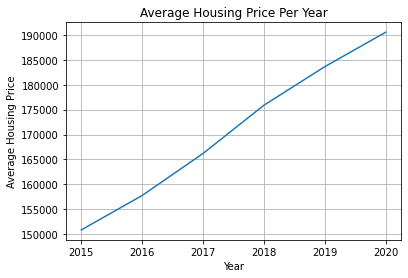

In [20]:
#create a line chart of the mean of the housing mean
# x-axis = RE_groupby_year.index.values, y-axis = RE_groupby_year["mean"] 
# the index values are the years, 2015, 2016 , etc. 
plt.plot(RE_groupby_year.index.values, RE_groupby_year["mean"])

# Add labels and title to graph
plt.xlabel("Year")
plt.ylabel("Average Housing Price")
plt.title("Average Housing Price Per Year")

plt.grid()
plt.show()

# positive relationship
# increasing housing price from 2015 to 2020
# add equation of line to show how much it increases 

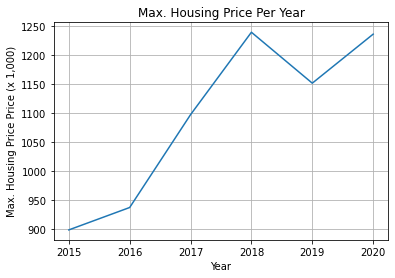

In [21]:
# looking at relationship of how much the max. housing price changes over the past 5 years

plt.plot(RE_groupby_year.index.values, RE_groupby_year["max"]/1000)

# Add labels and title to graph
plt.xlabel("Year")
plt.ylabel("Max. Housing Price Price (x 1,000)")
plt.title("Max. Housing Price Per Year")


plt.grid()
plt.show()



In [22]:
RE_groupby_year["max"]/10000

Year
2015     89.8866
2016     93.7493
2017    109.7507
2018    123.9591
2019    115.1808
2020    123.6298
Name: max, dtype: float64

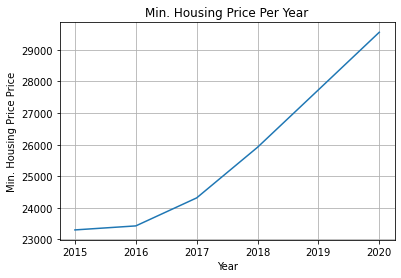

In [23]:
# looking at relationship of how much the min. housing price changes over the past 5 years

plt.plot(RE_groupby_year.index.values, RE_groupby_year["min"])

# Add labels and title to graph
plt.xlabel("Year")
plt.ylabel("Min. Housing Price Price")
plt.title("Min. Housing Price Per Year")


plt.grid()
plt.show()



In [24]:
# by state
RE_groupby_state = no_duplicate_RE_df.groupby(["State Name", "Year"]).describe()["Housing Price"]
RE_groupby_state

count           mean            std       min        25%  \
State Name Year                                                             
AK         2015   48.0  286494.270833   48992.882898  212331.0  261588.25   
           2016   48.0  293213.000000   50158.105966  221318.0  269936.75   
           2017   48.0  298904.937500   49144.760715  228078.0  276244.25   
           2018   48.0  303328.250000   50980.503062  235489.0  279821.75   
           2019   48.0  312966.062500   55535.895347  234930.0  283656.50   
...                ...            ...            ...       ...        ...   
WY         2016  108.0  251895.648148   89137.436710  183403.0  209137.00   
           2017  108.0  254714.018519   94087.942945  185197.0  199239.50   
           2018  108.0  265593.601852  104230.702178  189912.0  200341.75   
           2019  108.0  279593.074074  115215.247001  192164.0  213058.25   
           2020   90.0  290474.455556  120936.245411  201030.0  223623.25   

                      50%        75%       max  
State Name Year                                 
AK         2015  287364.0  310970.00  359709.0  
           2016  293447.0  316955.00  365086.0  
           2017  294953.5  317160.50  376272.0  
           2018  298080.5  320953.75  384139.0  
           2019  309350.0  338930.50  398425.0  
...                   ...        ...       ...  
WY         2016  218524.0  245648.75  500246.0  
           2017  220102.0  254394.25  519805.0  
           2018  229006.5  268738.25  563953.0  
           2019  241571.5  283716.50  610445.0  
           2020  250856.5  291983.25  622816.0  

[312 rows x 8 columns]

In [25]:
state_year_min_max = no_duplicate_RE_df.groupby(["State Name", "Year", "City Name"])["Housing Price"].agg(["min", "max"])
state_year_min_max

min       max
State Name Year City Name                       
AK         2015 Anchorage     291309.0  298990.0
                Fairbanks     212331.0  220678.0
                Juneau        346910.0  359709.0
                Ketchikan     275225.0  283419.0
           2016 Anchorage     299258.0  302397.0
...                                ...       ...
WY         2020 Jackson       613877.0  622816.0
                Laramie       248898.0  254539.0
                Riverton      212700.0  215697.0
                Rock Springs  232029.0  234911.0
                Sheridan      275823.0  281947.0

[5471 rows x 2 columns]

In [26]:
state_year_min_max_2 = state_year_min_max.reset_index()
state_year_min_max_2.sort_values(["State Name", "max"], inplace=True)
state_year_min_max_2.groupby(["State Name", "Year"]).last()

City Name       min       max
State Name Year                              
AK         2015    Juneau  346910.0  359709.0
           2016    Juneau  360629.0  365086.0
           2017    Juneau  365729.0  376272.0
           2018    Juneau  376696.0  384139.0
           2019    Juneau  385363.0  398425.0
...                   ...       ...       ...
WY         2016   Jackson  481377.0  500246.0
           2017   Jackson  500780.0  519805.0
           2018   Jackson  523364.0  563953.0
           2019   Jackson  565748.0  610445.0
           2020   Jackson  613877.0  622816.0

[312 rows x 3 columns]

In [27]:
state_year_min_max2 = state_year_min_max.copy().reset_index()
ls = {}
for i, row in state_year_min_max2.iterrows():
    if row["State Name"] not in ls:
        ls[row["State Name"]] = [10000000000, 0, "", "", 0, 0]
    if ls[row["State Name"]][0]>row["min"]:
        ls[row["State Name"]][0] =row["min"]
        ls[row["State Name"]][2] = row["City Name"]
        ls[row["State Name"]][4] = row["Year"]
    if ls[row["State Name"]][1]<row["max"]:
        ls[row["State Name"]][1] =row["max"]
        ls[row["State Name"]][3] = row["City Name"]
        ls[row["State Name"]][5] = row["Year"]
    a= 1
print(row)
# print(ls)
max_min_state_year = pd.DataFrame(ls).T
max_min_state_year.head()

State Name          WY
Year              2020
City Name     Sheridan
min             275823
max             281947
Name: 5470, dtype: object


,0,1,2,3,4,5
AK,212331,405114,Fairbanks,Juneau,2015,2020
AL,48536,234874,Selma,Daphne,2015,2020
AR,23303,210665,Blytheville,Fayetteville,2015,2020
AZ,125181,385809,Nogales,Flagstaff,2015,2020
CA,134642,1.23959e+06,El Centro,San Jose,2015,2018


In [28]:
max_min_state_year = max_min_state_year.rename(columns={
        0: "Min. Housing Price",
        1: "Max. Housing Price",
        2: "City of Min. Housing Price",
        3: "City of Max. Housing Price",
        4: "Year of Min. Housing Price",
        5: "Year of Max. Housing Price"})

max_min_state_year.head()

,Min. Housing Price,Max. Housing Price,City of Min. Housing Price,City of Max. Housing Price,Year of Min. Housing Price,Year of Max. Housing Price
AK,212331,405114,Fairbanks,Juneau,2015,2020
AL,48536,234874,Selma,Daphne,2015,2020
AR,23303,210665,Blytheville,Fayetteville,2015,2020
AZ,125181,385809,Nogales,Flagstaff,2015,2020
CA,134642,1.23959e+06,El Centro,San Jose,2015,2018


In [78]:
max_min_state_year1 = max_min_state_year[max_min_state_year.index !="Country"]
# max_min_state_year1.head()

Text(0, 0.5, 'Housing Price (Million $)')

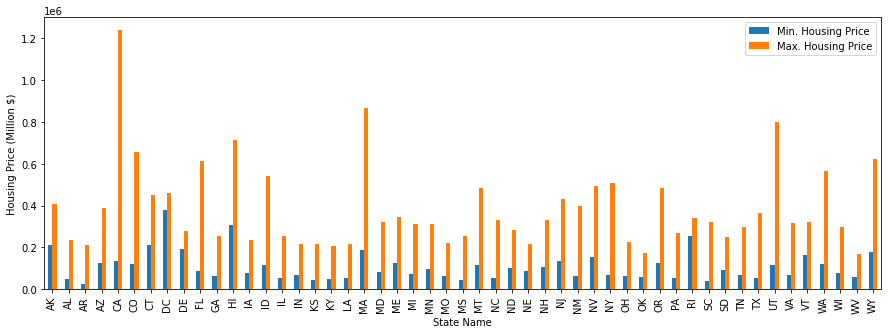

In [79]:
max_housing_price_bar = max_min_state_year1.plot(kind="bar", figsize=(15,5))

plt.xlabel("State Name")
plt.ylabel("Housing Price (Million $)")


In [30]:
homelessdata = "../Data/PIT_AllYearsData_Output.csv"
homeless_df = pd.read_csv(homelessdata)
homeless_df.head()

,Year,State,Overall Homeless,Sheltered Total Homeless,Unsheltered Homeless,Overall Homeless Individuals,Sheltered Total Homeless Individuals,Unsheltered Homeless Individuals,Overall Homeless People in Families,Sheltered Total Homeless People in Families,...,Unsheltered Chronically Homeless,Overall Chronically Homeless Individuals,Sheltered Total Chronically Homeless Individuals,Unsheltered Chronically Homeless Individuals,Overall Chronically Homeless People in Families,Sheltered Total Chronically Homeless People in Families,Unsheltered Chronically Homeless People in Families,Overall Homeless Veterans,Sheltered Total Homeless Veterans,Unsheltered Homeless Veterans
0,2019,AK,1907.0,1634,273,1384,1118,266,523,516,...,99,231,134,97,38,36,2,111,85,26
1,2019,AL,3261.0,2070,1191,2519,1429,1090,742,641,...,139,350,221,129,19,9,10,292,223,69
2,2019,AR,2717.0,1302,1415,2303,972,1331,414,330,...,453,676,223,453,15,15,0,238,153,85
3,2019,AZ,10007.0,5475,4532,7538,3099,4439,2469,2376,...,1210,1766,599,1167,110,67,43,910,598,312
4,2019,CA,151278.0,42846,108432,128777,25323,103454,22501,17523,...,33670,39275,6483,32792,2282,1404,878,10980,3261,7719


In [50]:
# homeless_df.dtypes

In [74]:
#group homeless by state
homeless_df_state = homeless_df.groupby("State").mean()
homeless_df_state

,Year,Overall Homeless
State,,
AK,2017,1932.800000
AL,2017,3713.800000
AR,2017,2583.800000
AZ,2017,9684.400000
CA,2017,129332.400000
CO,2017,10383.800000
CT,2017,3669.200000
DC,2017,7309.200000
DE,2017,1004.000000


In [75]:
len(homeless_df_state)

# drop PR, VI, GUI, MP, Total 

56

In [55]:
# average homeless number for each year
homeless_df1 = homeless_df.groupby("Year").sum()
homeless_df1

,Overall Homeless
Year,
2015,1129416.0
2016,1099856.0
2017,1101992.0
2018,1105660.0
2019,1135430.0


In [56]:
homeless_df2 = homeless_df.pivot(index='State', columns='Year', values='Overall Homeless')
homeless_df2.head()

Year,2015,2016,2017,2018,2019
State,,,,,
AK,1956.0,1940.0,1845.0,2016.0,1907.0
AL,3970.0,4111.0,3793.0,3434.0,3261.0
AR,2560.0,2463.0,2467.0,2712.0,2717.0
AZ,9896.0,9707.0,8947.0,9865.0,10007.0
CA,115738.0,118142.0,131532.0,129972.0,151278.0


In [57]:
homeless_df3 = pd.DataFrame(homeless_df2.iloc[:,0])
homeless_df3['2019'] = homeless_df2.iloc[:,4]
homeless_df3.head()

,2015,2019
State,,
AK,1956.0,1907.0
AL,3970.0,3261.0
AR,2560.0,2717.0
AZ,9896.0,10007.0
CA,115738.0,151278.0


In [58]:
RE_groupby_year = no_duplicate_RE_df.groupby("Year").describe()["Housing Price"]
RE_groupby_year

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2015,10876.0,150832.637734,92470.613915,23303.0,94966.50,125991.5,175459.00,898866.0
2016,10906.0,157750.918760,98699.060293,23430.0,98733.00,130219.0,185140.00,937493.0
2017,10940.0,166191.003656,105269.399338,24316.0,103274.50,136401.5,196437.00,1097507.0
2018,10966.0,175881.987872,113964.266262,25918.0,108626.00,143572.0,208440.00,1239591.0
2019,10968.0,183630.756018,116327.218718,27735.0,113879.75,150620.0,218755.75,1151808.0
2020,9140.0,190548.174070,120739.926230,29557.0,117704.00,156187.0,227485.50,1236298.0


In [67]:
RE_groupby_state = no_duplicate_RE_df.groupby("State Name").describe()["Housing Price"]
RE_groupby_state.head()


,count,mean,std,min,25%,50%,75%,max
State Name,,,,,,,,
AK,280.0,301423.103571,52866.019613,212331.0,267080.50,299388.5,329892.50,405114.0
AL,1470.0,118689.187075,37658.075919,48536.0,94958.50,112293.5,139969.50,234874.0
AR,1400.0,94508.052143,38668.725844,23303.0,65955.75,94758.0,119325.00,210665.0
AZ,767.0,205464.771838,60858.286249,125181.0,158274.00,189987.0,238201.50,385809.0
CA,2356.0,415984.521222,227267.739877,134642.0,240882.00,329970.0,573507.25,1239591.0


In [69]:
# drop off the data that has country 
RE_no_country_df = RE_groupby_state[RE_groupby_state.index !="Country"]
RE_no_country_df.head()


,count,mean,std,min,25%,50%,75%,max
State Name,,,,,,,,
AK,280.0,301423.103571,52866.019613,212331.0,267080.50,299388.5,329892.50,405114.0
AL,1470.0,118689.187075,37658.075919,48536.0,94958.50,112293.5,139969.50,234874.0
AR,1400.0,94508.052143,38668.725844,23303.0,65955.75,94758.0,119325.00,210665.0
AZ,767.0,205464.771838,60858.286249,125181.0,158274.00,189987.0,238201.50,385809.0
CA,2356.0,415984.521222,227267.739877,134642.0,240882.00,329970.0,573507.25,1239591.0


In [59]:
# Dropping the data from year 2020. Only need data from 2015 to 2019
RE_5_year_df = RE_groupby_year[RE_groupby_year.index !="2020"]
RE_5_year_df

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2015,10876.0,150832.637734,92470.613915,23303.0,94966.50,125991.5,175459.00,898866.0
2016,10906.0,157750.918760,98699.060293,23430.0,98733.00,130219.0,185140.00,937493.0
2017,10940.0,166191.003656,105269.399338,24316.0,103274.50,136401.5,196437.00,1097507.0
2018,10966.0,175881.987872,113964.266262,25918.0,108626.00,143572.0,208440.00,1239591.0
2019,10968.0,183630.756018,116327.218718,27735.0,113879.75,150620.0,218755.75,1151808.0


(-0.03843241697391084, 0.9510783758318877)
The correlation between average housing price and homeless population is -0.04


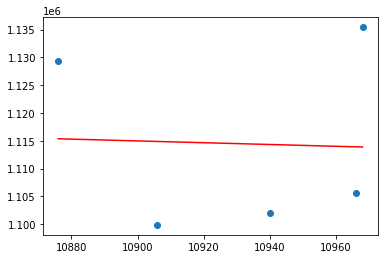

In [64]:

x_axis = RE_5_year_df["count"]
y_axis = homeless_df1["Overall Homeless"]

# finding the correlation 
correlation = sts.pearsonr(x_axis, y_axis)
print(correlation)

print(f"The correlation between average housing price and homeless population is {round(correlation[0],2)}")
#the correlation coefficient between 

# go back up and add this -> scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
# the code below is to show the line equation
# plt.annotate(line_eq,(20,40),fontsize=10,color="red")
plt.show()

In [ ]:
# mean price of the city based on state
# RE_groupby_city = no_duplicate_RE_df.groupby(["State Name", "City Name"]).mean()["Housing Price"]
# RE_groupby_city

# RE_groupby_city2 = no_duplicate_RE_df.groupby(["State Name", "City Name"]).median()["Housing Price"]
# RE_groupby_city2


In [ ]:
# # reset_index(), switch the year as index from previously to become a column again
# RE_groupby_city = RE_groupby_city.reset_index()
# RE_groupby_city

# # sorting the value of the city based on housing price

# RE_groupby_city = RE_groupby_city.sort_values("Housing Price")

# # Cheapest house
# # we are using the first value of each state based on the lowest price of the house
# RE_groupby_city_cheap = RE_groupby_city.groupby("State Name").first()
# RE_groupby_city_cheap.head()

In [ ]:
RE_groupby_city.tail()

In [ ]:
round(RE_groupby_city.loc[912, "Housing Price"], 2)

In [ ]:
RE_groupby_city["Housing Price"] = [round(x, 2) for x in RE_groupby_city["Housing Price"]]
RE_groupby_city.tail()

In [ ]:
# Most expensive house 
# extract the most expensive price of the house based on states
RE_groupby_city_max = RE_groupby_city.groupby("State Name").last()
RE_groupby_city_max["Housing Price"] = [round(x, 2) for x in RE_groupby_city_max["Housing Price"]]

# RE_groupby_city_max.head()


# expand the width of the column 
# RE_groupby_city_max = RE_groupby_city_max.style.set_properties(subset=['Housing Price'], **{'width-min': '300px'})
RE_groupby_city_max.plot()

